In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [3]:
base = pd.read_csv('../../Data/BaseData.csv')

In [4]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [5]:
len(y)

2580

In [6]:
X.shape

(2580, 298)

In [7]:
X.shape[1]

298

In [8]:
Scores = []
AdjR2 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    elastic = ElasticNet(alpha=1, l1_ratio=0.5)
    elastic.fit(X_train_scaled,Y_train)
    Elastic_Score = elastic.score(X_test_scaled, Y_test)
    
    Scores.append(Elastic_Score)
    
    Adj_r2 = 1 - (1-Elastic_Score) * (len(y)-1)/(len(y)-X.shape[1]-1)
    AdjR2.append(Adj_r2)
    

In [9]:
PositiveR2 = []
NegativeR2 = []

for i in Scores:
    if i < 0:
        NegativeR2.append(i)
    else:
        PositiveR2.append(i)

In [10]:
PositiveAR2 = []
NegativeAR2 = []

for i in AdjR2:
    if i < 0:
        NegativeAR2.append(i)
    else:
        PositiveAR2.append(i)

In [11]:
R2 = pd.DataFrame(PositiveR2, columns=['R_Squared'])
AR2 = pd.DataFrame(PositiveAR2, columns=['Adjusted_R2'])
R2vAR2 = pd.concat([R2, AR2], axis=1)

In [12]:
R2vAR2

,R_Squared,Adjusted_R2
0,0.897096,0.883652
1,0.878239,0.862332
2,0.863603,0.845784
3,0.862325,0.844339
4,0.904136,0.891612
...,...,...
95,0.869381,0.852316
96,0.896538,0.883021
97,0.922960,0.912895
98,0.896311,0.882765


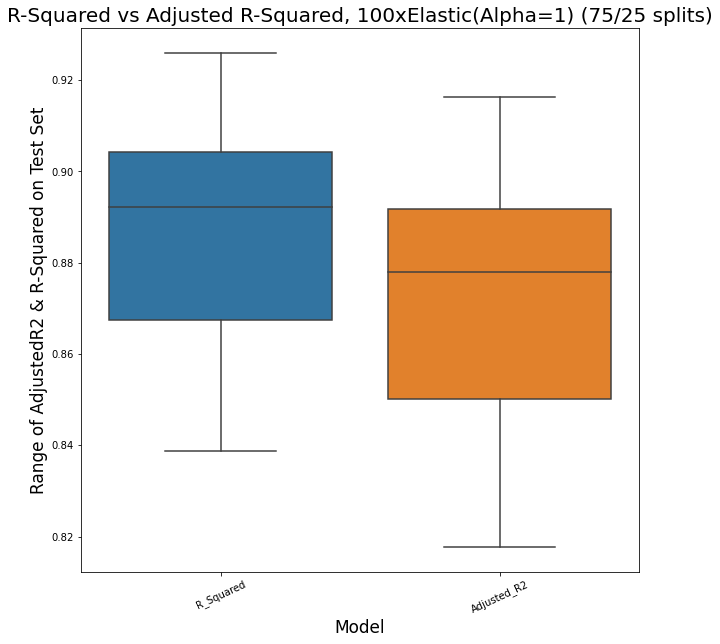

In [13]:
plt.figure(figsize=(10,10))
plt.title('R-Squared vs Adjusted R-Squared, 100xElastic(Alpha=1) (75/25 splits)', fontsize=20)
plt.ylabel('Range of AdjustedR2 & R-Squared on Test Set', fontsize=17)
plt.xlabel('Model', fontsize=17)
sns.boxplot(data=R2vAR2)
plt.xticks(rotation=25);

In [14]:
print("Number of times results produced Negative R2: " + str((len(NegativeR2))))
print("Number of times results produced Negative Adjusted R2: " + str((len(NegativeAR2))))

Number of times results produced Negative R2: 0
Number of times results produced Negative Adjusted R2: 0


In [16]:
#df = pd.DataFrame(Positive, columns=['ElasticNet(A=1)'])
R2vAR2.to_csv('EN_R2vAR2.csv', index=False)

In [17]:
R2vAR2['Difference'] = R2vAR2['R_Squared'] - R2vAR2['Adjusted_R2']

In [18]:
R2vAR2

,R_Squared,Adjusted_R2,Difference
0,0.897096,0.883652,0.013444
1,0.878239,0.862332,0.015907
2,0.863603,0.845784,0.017819
3,0.862325,0.844339,0.017986
4,0.904136,0.891612,0.012524
...,...,...,...
95,0.869381,0.852316,0.017065
96,0.896538,0.883021,0.013517
97,0.922960,0.912895,0.010065
98,0.896311,0.882765,0.013546


In [19]:
R2vAR2.Difference.mean()

0.014869163718736271

In [20]:
R2vAR2.describe()

,R_Squared,Adjusted_R2,Difference
count,100.000000,100.000000,100.000000
mean,0.886186,0.871317,0.014869
std,0.021925,0.024790,0.002864
min,0.838790,0.817729,0.009666
25%,0.867408,0.850086,0.012498
50%,0.892104,0.878008,0.014096
75%,0.904339,0.891841,0.017322
max,0.926016,0.916351,0.021061
